<a href="https://colab.research.google.com/github/gnishitha2004-source/AI-ML-Internship-Task3/blob/main/linear_regression_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Display options
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 120)
print('Libraries imported successfully')

Libraries imported successfully


In [3]:
# Load California Housing dataset and create a DataFrame
housing = fetch_california_housing(as_frame=True)
df = housing.frame.copy()
# target is 'MedHouseVal' (median house value)
df.rename(columns={'MedHouseVal':'MedHouseValue'}, inplace=True)
print('Shape:', df.shape)
df.head()

Shape: (20640, 9)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
# Quick EDA
print(df.info())
print('\nSummary statistics:')
print(df.describe().T)

# Correlation with target
corr_target = df.corr()['MedHouseValue'].sort_values(ascending=False)
print('\nTop correlations with target:')
print(corr_target.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MedInc         20640 non-null  float64
 1   HouseAge       20640 non-null  float64
 2   AveRooms       20640 non-null  float64
 3   AveBedrms      20640 non-null  float64
 4   Population     20640 non-null  float64
 5   AveOccup       20640 non-null  float64
 6   Latitude       20640 non-null  float64
 7   Longitude      20640 non-null  float64
 8   MedHouseValue  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None

Summary statistics:
                 count         mean          std         min         25%          50%          75%           max
MedInc         20640.0     3.870671     1.899822    0.499900    2.563400     3.534800     4.743250     15.000100
HouseAge       20640.0    28.639486    12.585558    1.000000   18.000000    29.000000    37.000000     52.000000
Ave

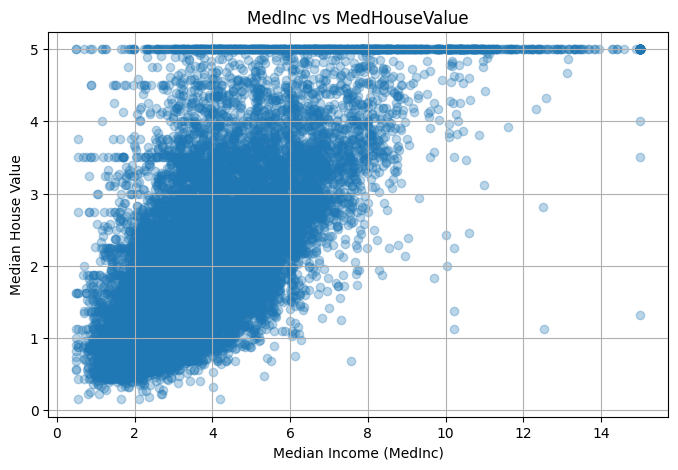

In [5]:
# Visualize relationship between the top feature and target
# We'll use 'MedInc' (median income) as a strong predictor
plt.figure(figsize=(8,5))
plt.scatter(df['MedInc'], df['MedHouseValue'], alpha=0.3)
plt.xlabel('Median Income (MedInc)')
plt.ylabel('Median House Value')
plt.title('MedInc vs MedHouseValue')
plt.grid(True)
plt.show()

In [6]:
# Prepare features and target
X = df.drop(columns=['MedHouseValue'])
y = df['MedHouseValue']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Train shape:', X_train.shape, 'Test shape:', X_test.shape)

Train shape: (16512, 8) Test shape: (4128, 8)


In [7]:
# Simple Linear Regression using MedInc as single feature
X_train_medinc = X_train[['MedInc']]
X_test_medinc = X_test[['MedInc']]

lr_simple = LinearRegression()
lr_simple.fit(X_train_medinc, y_train)

y_pred_simple = lr_simple.predict(X_test_medinc)

# Evaluation
mae_s = mean_absolute_error(y_test, y_pred_simple)
mse_s = mean_squared_error(y_test, y_pred_simple)
r2_s = r2_score(y_test, y_pred_simple)
print(f'Simple LR (MedInc) -> MAE: {mae_s:.4f}, MSE: {mse_s:.4f}, R2: {r2_s:.4f}')

# Coefficients
print('Intercept:', lr_simple.intercept_)
print('Coefficient for MedInc:', lr_simple.coef_[0])

Simple LR (MedInc) -> MAE: 0.6299, MSE: 0.7091, R2: 0.4589
Intercept: 0.4445972916907879
Coefficient for MedInc: 0.4193384939381271


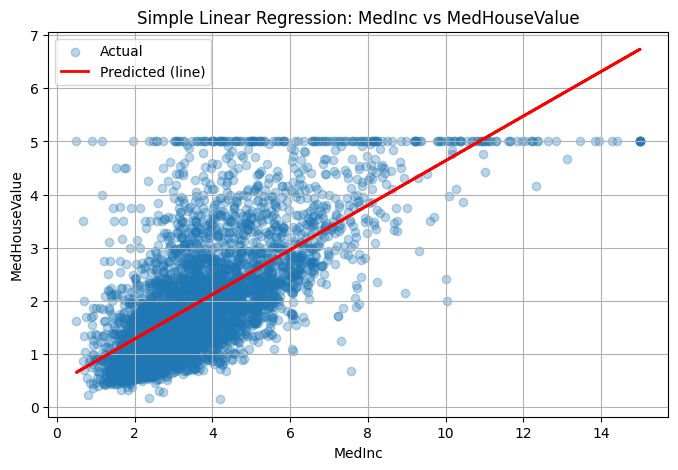

In [8]:
# Plot regression line on test set
plt.figure(figsize=(8,5))
plt.scatter(X_test_medinc, y_test, alpha=0.3, label='Actual')
plt.plot(X_test_medinc, y_pred_simple, color='red', linewidth=2, label='Predicted (line)')
plt.xlabel('MedInc')
plt.ylabel('MedHouseValue')
plt.title('Simple Linear Regression: MedInc vs MedHouseValue')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
# Multiple Linear Regression using all features
lr_multi = LinearRegression()
lr_multi.fit(X_train, y_train)

y_pred_multi = lr_multi.predict(X_test)

# Evaluation
mae_m = mean_absolute_error(y_test, y_pred_multi)
mse_m = mean_squared_error(y_test, y_pred_multi)
r2_m = r2_score(y_test, y_pred_multi)
print(f'Multiple LR -> MAE: {mae_m:.4f}, MSE: {mse_m:.4f}, R2: {r2_m:.4f}')

Multiple LR -> MAE: 0.5332, MSE: 0.5559, R2: 0.5758


In [10]:
# Coefficients from multiple linear regression
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': lr_multi.coef_})
coef_df = coef_df.sort_values(by='Coefficient', key=lambda c: c.abs(), ascending=False)
coef_df.reset_index(drop=True, inplace=True)
coef_df

,Feature,Coefficient
0,AveBedrms,0.783145
1,MedInc,0.448675
2,Longitude,-0.433708
3,Latitude,-0.419792
4,AveRooms,-0.123323
5,HouseAge,0.009724
6,AveOccup,-0.003526
7,Population,-0.000002


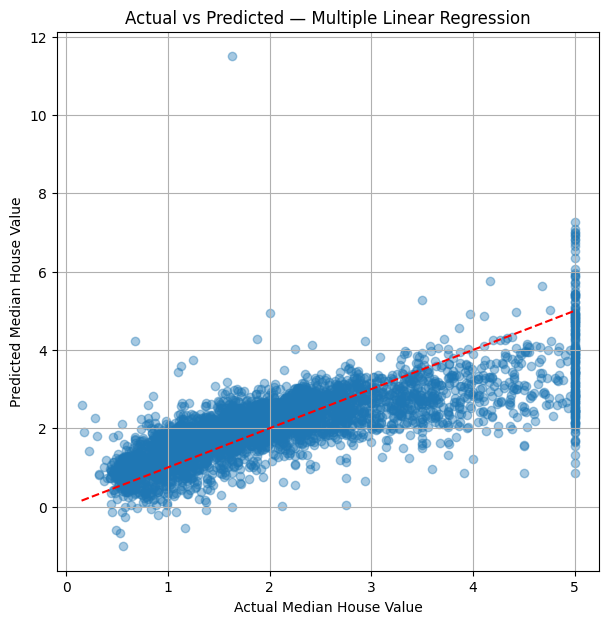

In [11]:
# Actual vs Predicted (Multiple LR)
plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred_multi, alpha=0.4)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Actual vs Predicted — Multiple Linear Regression')
plt.grid(True)
plt.show()

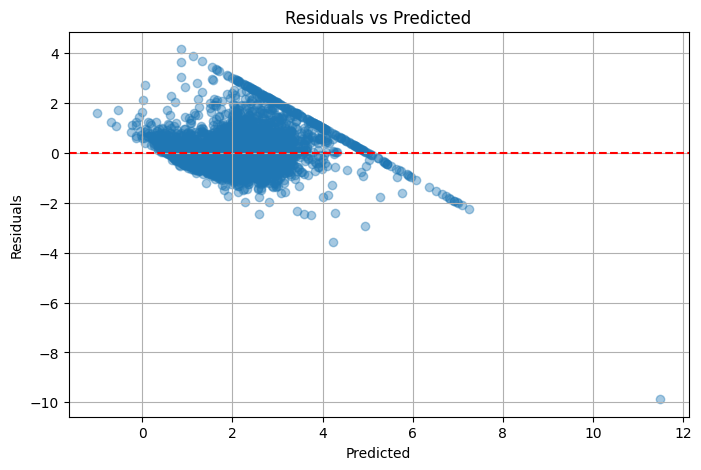

In [12]:
# Residual plot
residuals = y_test - y_pred_multi
plt.figure(figsize=(8,5))
plt.scatter(y_pred_multi, residuals, alpha=0.4)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')
plt.grid(True)
plt.show()

In [13]:
summary = pd.DataFrame({
    'Model': ['Simple (MedInc)', 'Multiple (all features)'],
    'MAE': [mae_s, mae_m],
    'MSE': [mse_s, mse_m],
    'R2': [r2_s, r2_m]
})
summary

,Model,MAE,MSE,R2
0,Simple (MedInc),0.629909,0.709116,0.458859
1,Multiple (all features),0.533200,0.555892,0.575788


In [14]:
# Save a small CSV of actual vs predicted for the multiple model
pred_df = pd.DataFrame({'Actual': y_test.reset_index(drop=True), 'Predicted': y_pred_multi})
pred_df.head(20).to_csv('predictions_sample.csv', index=False)
print('Saved predictions_sample.csv to current working directory')

Saved predictions_sample.csv to current working directory
